# Homework 3

## K-Center: implementation Fartherst-First Traversal algorithm

Vediamo n po' che ce esce fuori.

Iniziamo senza saper ne leggere ne scrivere a chiamare le librerie

In [1]:
from pyspark import SparkConf, SparkContext

config = SparkConf().setAppName('Homework 3').setMaster('local')

sc = SparkContext(conf=config)

### readVectorsSeq
Construction of the requested function:
A function readVectorsSeq(filename) that, given in input the name (or path) filename of a text file containing points in Euclidean space (one point per line with coordinates separated by space, as in the files above) transforms it into a list of Vector. 



In Spark, the points can be represented as instances of the class org.apache.spark.mllib.linalg.Vector and can be manipulated through static methods offered by the class org.apache.spark.mllib.linalg.Vectors (these classes are available both for Java and Python). For example, method Vectors.dense(x) transforms an array x of double into an instance of class Vector, while method Vectors.sqdist(a,b) computes the squared L2-distance between two instances a and b of class Vector. For Java users, you can download the class InputOutput, where you find a method InputOutput.readVectorsSeq that, given in input the name (or path) of a text file containing points in Euclidean space (one point per line with coordinates separated by space, as in the files above) transforms it into a java.util.ArrayList<Vector>. 

In [77]:
from pyspark.mllib.linalg import Vector, Vectors
import numpy as np

test = [1,2,3]

ue = Vectors.dense(test)
ue2 = Vectors.dense([3,4,5])


In [197]:
def readVectorsSeq(filename):
    file = open(filename,'r')
    vec_list = []
    for line in file:
        vec_list.append(Vectors.dense([float(num_str) for num_str in line.split()]))
    return vec_list

A function kcenter(P,k) that receives in input a set of points P and an integer k, and returns the set C of k centers computed by the Farthest-First Traversal algorithm. You can represent both P and C as lists of Vector. 

In [114]:
from random import randint

def kcenter(P,k): #versione non ottimizzata, si può migliorare le prestazioni della ricerca del minimo forse
    S = [P[randint(0,len(P)-1)]]

    for i in range(k-1):
        #Find the point that minimize 
        listOfD = []
        for point in P:
            if point not in S:
                distVec = [Vectors.squared_distance(point,c) for c in S]
                minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
                listOfD.append(minD_c)
            else: listOfD.append(0)
        newCenter_index = np.argmax(listOfD)
        newCenter = P[newCenter_index]
        S.append(newCenter)
    return S

In [126]:
def kcenter_opt(P,k): #versione non ottimizzata, si può migliorare le prestazioni della ricerca del minimo forse
    S = [P[randint(0,len(P)-1)]]

    for i in range(k-1):
        #Find the point that minimize 
        currentmax = 0
        for point in P:
            if point not in S:
                distVec = [Vectors.squared_distance(point,c) for c in S]
                minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
                if minD_c > currentmax:
                    currentmax = minD_c
                    currentmaxpoint = point
        S.append(currentmaxpoint)
    return S

In [149]:
def kcenter_opt2(P,k): #versione ottimizzata, tolgo l'if che mi calcola cose ogni volta
    #init P and S
    P_minus_S = [point for point in P]
    S = [P[randint(0,len(P)-1)]]
    P_minus_S.remove(S[0])
    
    for i in range(k-1):
        #Find the point that minimize 
        currentmax = 0
        for point in P_minus_S:
            distVec = [Vectors.squared_distance(point,c) for c in S]
            minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
            if minD_c > currentmax:
                currentmax = minD_c
                currentmaxpoint = point
        S.append(currentmaxpoint)
        P_minus_S.remove(currentmaxpoint)
    return S

In [161]:
def kcenter_opt2_fullSearch(P,k): #versione che calcola meglio l'ultimo
    #init P and S
    P_minus_S = [point for point in P]
    S = [P[randint(0,len(P)-1)]]
    P_minus_S.remove(S[0])
    
    for i in range(k-1):
        #Find the point that minimize 
        currentmax = 0
        for point in P_minus_S:
            distVec = [Vectors.squared_distance(point,c) for c in S]
            minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
            if minD_c > currentmax:
                currentmax = minD_c
                currentmaxpoint = point
        S.append(currentmaxpoint)
        P_minus_S.remove(currentmaxpoint)
        
    #Tolgo il primo centroide e lo ricalcolo
    S.remove(S[0])
    currentmax = 0
    for point in P_minus_S:
        distVec = [Vectors.squared_distance(point,c) for c in S]
        minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
        if minD_c > currentmax:
            currentmax = minD_c
            currentmaxpoint = point
    S.append(currentmaxpoint)
    
    return S

In [143]:
print(vec_list.remove(vec_list[4]))
print(len(vec_list))

None
4


In [134]:
P = readVectorsSeq('prova.txt')
k=3


S = [P[1]]

for i in range(k-1):
    #Find the point that minimize 
    listOfD = []
    for point in P:
        if point not in S:
            distVec = [Vectors.squared_distance(point,c) for c in S]
            minD_c = np.min(distVec) #the minumim distance of the point from the set of clusters
            listOfD.append(minD_c)
    newCenter_index = np.argmax(listOfD)
    newCenter = P[newCenter_index]
    S.append(newCenter)
                        

# Gujo's code - 2D dataset Test
ebbravo guglielmone

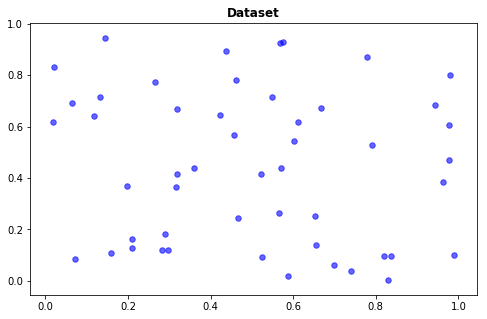

In [170]:
import matplotlib.pyplot as plt

vector_list = []
np.random.seed(seed=0)
n_points = 50
for i in range(n_points):
    vector_list.append(Vectors.dense(np.random.rand(2)))

# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='blue', s=30, alpha=0.6)
plt.show()

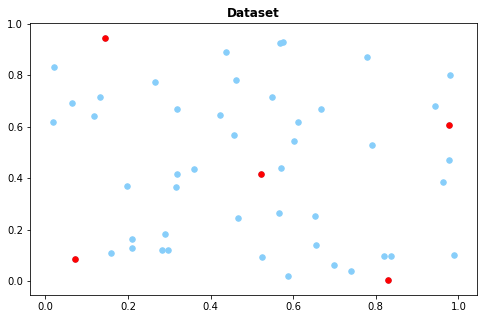

In [173]:
P = [p for p in vector_list]
centers = kcenter_opt(P, 5)

# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='red', s=30, zorder=10)
    
plt.show()

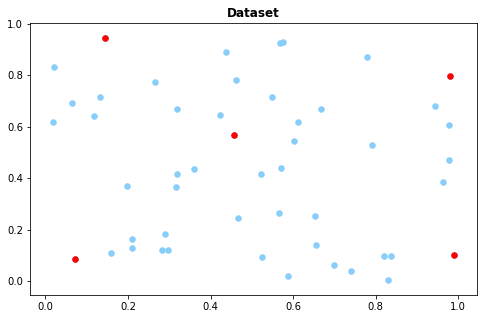

In [172]:
P = [p for p in vector_list]
centers = kcenter_opt2_fullSearch(P, 5)

# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, zorder=5)
    
# Plot the Centers
for i in range(len(centers)):
    center_i = centers[i]
    plt.scatter(center_i[0], center_i[1], c='red', s=30, zorder=10)
    
plt.show()

In [175]:
def lossFunctionKCenter(P,S):
    partial_sum = 0
    for point in P:
        partial_sum = partial_sum + sum([Vectors.squared_distance(point,c) for c in S])
    return partial_sum

In [190]:
k=5
P = vec_list
loss1 = lossFunctionKCenter(P,kcenter(P,k))
loss2 = lossFunctionKCenter(P,kcenter_opt2_fullSearch(P,k))
print('loss of kcenter:', loss1)
print('loss of kcenter full:', loss2)

ValueError: list.remove(x): x not in list

Fit of the Time Complexity:
Time = 0.0002508972390072974 * |P| + 0.0009406045018404731 [s]


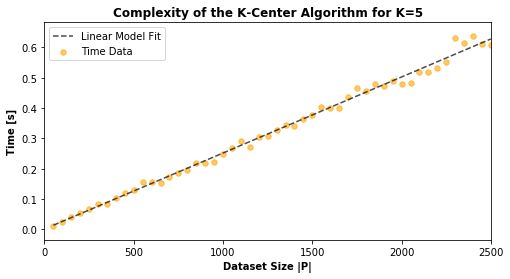

In [166]:
import time
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 50*(n+1)
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kcenter_opt2_fullSearch(P, 5)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)*n_datasets
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([(i+1)*50 for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

print('Fit of the Time Complexity:')
print('Time =', beta[1,0],'* |P| +', beta[0,0], '[s]')

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Center Algorithm for K=5', fontweight='bold')
plt.scatter([(i+1)*50 for i in range(n_datasets)], times, alpha=0.6, c='orange', label='Time Data', s=30)
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Dataset Size |P|', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets*n_datasets)
plt.legend(loc=2, prop={'size':10})
plt.show()

In [152]:
0.00019489988645299437/6.28997402030881e-05

3.0985801503107906

In [128]:
0.0003034148018185547/0.00031487514889683914

0.9636035199397742

In [148]:
0.00031487514889683914/0.00021611628057289822

1.4569709790587875

In [131]:
{1,2,3}


{1, 2, 3}

# k-means++

A function kmeansPP(P,k) that receives in input a set of points P and an integer k, and returns a set C of k centers computed with the kmeans++ algorithm. 

In [294]:
def kmeansPP(P,k):
    rnd_idx = randint(0,len(P)-1)
    S = [P[rnd_idx]]
    P_minus_S = [p for p in P]
    P_minus_S.remove(S[0])

    for i in range(1,k+1):
        j=0
        d_p = np.zeros(len(P_minus_S))
        for point in P_minus_S:
            d_p[j]=np.min([Vectors.squared_distance(c,point) for c in S])
            j+=1
        power2 = np.power(d_p,2)
        prob = power2/np.sum(power2) #probability density
        c_new = np.random.choice(range(len(P_minus_S)),1,p=prob)
        S.append(P_minus_S[int(c_new)])
        P_minus_S.remove(P_minus_S[int(c_new)])
    return S

In [317]:
P = readVectorsSeq('prova.txt')
k = 3

S = kmeansPP(P,k)

A function kmeansObj(P,C) that receives in input a set of points P and a set of centers C, and returns the average squared distance of a point of P from its closest center (i.e., the kmeans objective function for P with centers C, divided by the number of points of P). 

In [319]:
def kmeansObj(P,C):
        cum_dist = 0
        for point in P:
            distance_closest_center = np.min([Vectors.squared_distance(point,c) for c in C])
            cum_dist += distance_closest_center
        return cum_dist/len(P)

In [320]:
print(kmeansObj(P,S))

0.5753003336521296


Fit of the Time Complexity:
Time = 0.00027254525810873676 * |P| + 0.0010102976584915116 [s]


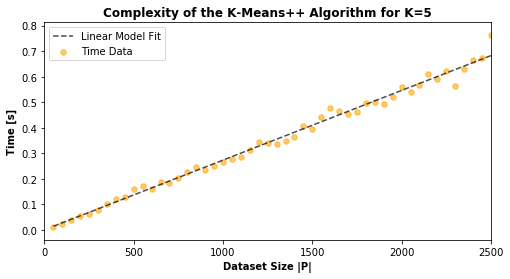

Fit of the Time Complexity:
Time = 0.020769242072591978 * K + -0.11946261289168397 [s]


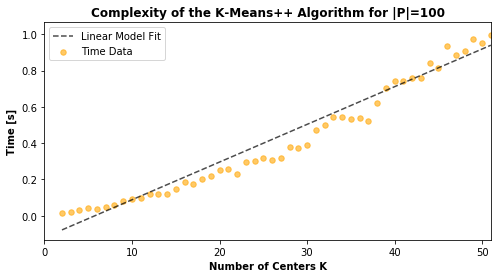

In [321]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 50*(n+1)
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kmeansPP(P, 5)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)*n_datasets
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([(i+1)*50 for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

print('Fit of the Time Complexity:')
print('Time =', beta[1,0],'* |P| +', beta[0,0], '[s]')

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Means++ Algorithm for K=5', fontweight='bold')
plt.scatter([(i+1)*50 for i in range(n_datasets)], times, alpha=0.6, c='orange', label='Time Data', s=30)
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Dataset Size |P|', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets*n_datasets)
plt.legend(loc=2, prop={'size':10})
plt.show()

# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 100
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kmeansPP(P, 2+n)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([2+i for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

print('Fit of the Time Complexity:')
print('Time =', beta[1,0],'* K +', beta[0,0], '[s]')


# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Means++ Algorithm for |P|=100', fontweight='bold')
plt.scatter([2+i for i in range(n_datasets)], times, s=30, c='orange', alpha=0.6, label='Time Data')
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Number of Centers K', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets+1)
plt.legend(loc=2, prop={'size':10})
plt.show()